##   Problem Definition
Goal: Predict whether a customer will churn (leave the service) based on their profile and service usage.


# 1. Importing  Basic libraries like:
pandas,numpy,seaborn,matplotlib

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns




### For handling class imbalance
from imblearn.over_sampling import SMOTE,

Libraries for Preprocessing and model building 

### pip install imbalanced-learn,

from imblearn.over_sampling import SMOTE


#### from imblearn.over_sampling import SMOTE
## What is SMOTE?
SMOTE stands for Synthetic Minority Over-sampling Technique.

It helps balance the dataset by creating synthetic samples of the minority class (in our case, Churn = Yes) instead of just duplicating rows.
When to Use SMOTE:
After encoding and scaling

Only on training data (not test data!)

Best used with models like Logistic Regression, Random Forest, etc.

### train_test_split:
Splits your data into training and testing sets
### cross_val_score:	
Performs cross-validation to test model robustness
### Use of DecisionTreeClassifier:
To build a model that splits decisions based on feature values
#### Metric,	Tells You...,	When to Use:
accuracy_score	,Overall correctness	,Balanced datasets

confusion_matrix,	Detailed error types (FP, FN, etc.),	Any classification

classification_report,	(Precision, Recall, F1 per class),	Imbalanced datasets like churn

In [3]:
# For encoding categorical columns
from sklearn.preprocessing import LabelEncoder

# For handling class imbalance
from imblearn.over_sampling import SMOTE

# For splitting data & validating model
from sklearn.model_selection import train_test_split, cross_val_score

# For training models
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

# For evaluating model performance
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# For saving/loading trained model
import pickle


# 2. Data Loading and Understanding

In [4]:
#load Telco csv data to pandas Dataframe
df=pd.read_csv("Telco-Customer-Churn.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [5]:
df.shape

(7043, 21)

In [6]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
pd.set_option("display.max_columns",None) 
# Show all columns in output

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
#dropping column customer iD this is not required for churn model,


# Why is customerID not required?
# Because it is just an identifier, not a feature that influences churn.
df =df.drop(columns=["customerID"])
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [10]:
# printing the unique values in all columns

numerical_feature_list = ["tenure", "MonthlyCharges", "TotalCharges"] #used this because we don't want any numerical value there but only categorical value
for col in df.columns:
    if col not in numerical_feature_list:
        print(col,df[col].unique())
        print("-"*50)#It prints a horizontal line of 50 dashes:
# printing the unique values in all columns but manuaally
# print(df["gender"].unique())     can type for all but might be time consuming so we used for loop
    

gender ['Female' 'Male']
--------------------------------------------------
SeniorCitizen [0 1]
--------------------------------------------------
Partner ['Yes' 'No']
--------------------------------------------------
Dependents ['No' 'Yes']
--------------------------------------------------
PhoneService ['No' 'Yes']
--------------------------------------------------
MultipleLines ['No phone service' 'No' 'Yes']
--------------------------------------------------
InternetService ['DSL' 'Fiber optic' 'No']
--------------------------------------------------
OnlineSecurity ['No' 'Yes' 'No internet service']
--------------------------------------------------
OnlineBackup ['Yes' 'No' 'No internet service']
--------------------------------------------------
DeviceProtection ['No' 'Yes' 'No internet service']
--------------------------------------------------
TechSupport ['No' 'Yes' 'No internet service']
--------------------------------------------------
StreamingTV ['No' 'Yes' 'No internet 

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [12]:
#converting object type data of total charges to int or float64
df["TotalCharges"] = df["TotalCharges"].astype(float) #will give error 

ValueError: could not convert string to float: ' '

In [ ]:
# so to avoid error we will do
df[df["TotalCharges"]==" "]


In [ ]:
# len(df[df["TotalCharges"]==" "]) #or  # Or df["TotalCharges"].eq(" ").sum() # Check how many blank values exist

In [ ]:
# df["TotalCharges"].replace({" ","0.0"}) # will depricated so use: # Replace blanks with NaN first (cleaner than replacing with 0)
# df["TotalCharges"]=df["TotalCharges"].replace(" ", pd.NA)
# Check which values are causing the issue


In [ ]:
#step1 
# List all unique problematic values in the column
invalid_values = df[~df["TotalCharges"].astype(str).str.replace('.', '', 1).str.isdigit()]
print("Invalid TotalCharges rows:")
print(invalid_values["TotalCharges"].unique())


##  3.  Cleaning of data

In [ ]:
#Step 2: Remove Only Invalid Entries
# Clean and convert safely .Ensured all values are strings (even if they were NaN or numbers).
# .str.strip() removes any spaces like " 45.6 " → "45.6".


df["TotalCharges"] = df["TotalCharges"].astype(str).str.strip()

# Remove known invalid patterns
df = df[~df["TotalCharges"].isin(["", " ", "<NA>", "nan", "NaN"])]

# Now convert to float safely
df["TotalCharges"] = df["TotalCharges"].astype(float)

# Reset index to keep things clean
df.reset_index(drop=True, inplace=True)

# Final check
print("✅ Cleaned! Data type:", df["TotalCharges"].dtype)


In [ ]:
# Keep only rows where TotalCharges is numeric
df = df[df["TotalCharges"].apply(lambda x: str(x).replace('.', '', 1).isdigit())]
df["TotalCharges"] = df["TotalCharges"].astype(float)


In [ ]:
df.info()

### Distribution of target column:

Churn column (whether a customer has left or stayed)

In [ ]:
#checking the distribution of target column

print(df["Churn"].value_counts())   #Run this to see how many customers churned vs. stayed:

# Insights:-
1. Customer ID rempved as it is not required for modelling.
2. No missing values in the dataset.
3. Missing values in TotalCharges column were replaced with 0
4. class imbalance identified in the target. this imbalance will be handled using techniques like SMOTE during model training.

#### Class imbalance becomes critical when we move to the Modeling phase.

## Here's how:
Problem: If you train a model without handling imbalance, it may predict mostly 'No' (majority class), and still get high accuracy — but it'll fail to detect churners.


#### solution:Apply techniques like:

SMOTE (Synthetic Minority Oversampling Technique) from imblearn

Adjusting class weights in classifiers

Undersampling the majority class (less common)




# 3.Exploratory Data Analysis (EDA):-


In [ ]:
df.shape

In [ ]:
df.columns

In [ ]:
df.dtypes

In [ ]:
df.head(2)

In [ ]:
df.describe()

In [ ]:
df.isnull().sum()

 ## Numerical Feature Analysis:
understand the distribution of Numerical features

In [ ]:
def plot_histogram(df, column_name):
    sns.histplot(df[column_name], kde=True, color='skyblue', edgecolor='black')
    plt.title(f"Distribution of {column_name}")

    # Calculate mean and median values for the column
    col_mean = df[column_name].mean()
    col_median = df[column_name].median()

    # Add vertical lines for mean and median
    plt.axvline(col_mean, color="red", linestyle="--", label=f"Mean: {col_mean:.2f}")
    plt.axvline(col_median, color="green", linestyle="--", label=f"Median: {col_median:.2f}")

    # Label axes
    plt.xlabel(column_name)
    plt.ylabel("Count")
    plt.legend()
    plt.show()


In [ ]:
plot_histogram(df, "MonthlyCharges")


In [ ]:
plot_histogram(df, "TotalCharges")


In [ ]:
plot_histogram(df, "tenure")


## what is scaling 
Bring features to the same scale
### Why?
Needed for distance-based models
### Where?
Logistic, SVM, KNN, Neural Nets
### How?
StandardScaler, MinMaxScaler etc.
### Advantage?	
    Fast convergence, balanced input
### Disadvantage?	
    Harder interpretation, not always needed

#### But scaling is important — especially if you're going to use:

Logistic Regression

SVM

KNN

Neural Networks

For tree-based models, scaling is not required.





In [ ]:
from sklearn.preprocessing import StandardScaler

# select only numerical columns
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])


### Detect Outliers in Numeric Columns by using **Boxplot**
Boxplots help us visually identify extreme values in features like:

MonthlyCharges,TotalCharges,tenure

## Why use a boxplot here?
Purpose	:Why it helps in this project


Detect Outliers	:Outliers can mislead models


Understand Spread:	Helps decide scaling or transformation


Compare Churn Groups:	See how churners differ from non-churners


Visual Summary	Quick view of median, IQR, and data skewness


In [ ]:
def plot_boxplot(df,column_name):
    sns.boxplot(df[column_name])
    plt.title("Boxplot of(column_name")
    plt.ylabel(column_name)
    plt.show()

In [ ]:
plot_boxplot(df,"tenure")

In [ ]:
plot_boxplot(df,"MonthlyCharges")

In [ ]:
plot_boxplot(df,"TotalCharges")

## correlation heatmap for numerical columns:
A correlation heatmap is a colored grid that shows the correlation coefficient (from -1 to 1) between pairs of numerical features.
Correlation Value:	Meaning

+1:	 Perfect positive correlation,

0:   No correlation,

-1:	 Perfect negative correlation,

 


In [ ]:
#correlation matrix - heatmap
sns.heatmap(df[["tenure","MonthlyCharges","TotalCharges"]].corr(),annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Categorical feature - Analysis:-

In [ ]:
df.columns

In [ ]:
df.info()

 ## Analyzing categorical features using count plot :-
 After analyzing numerical features, it’s important to analyze categorical features — especially because many important columns like gender, Contract, InternetService, etc., are categorical in your churn dataset.
 ### summary for categorical fetures:
 
 Find all categorical columns (like gender, contract, etc.) from your dataset using .select_dtypes(include="object").

Manually add SeniorCitizen to the list because even though it's stored as numbers (0 or 1), it actually represents a category (Yes/No).

Save them in a list called obj_cols so that later you can:

Plot graphs (like bar charts)

Encode them for machine learning models

### Why This Is Important:
You need to treat categorical features differently than numerical ones in:

Exploratory Data Analysis (EDA),Data Preprocessing (like Label Encoding / OneHot Encoding),Model building


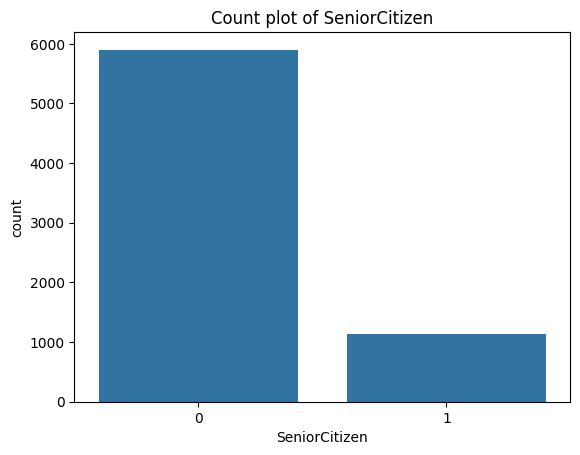

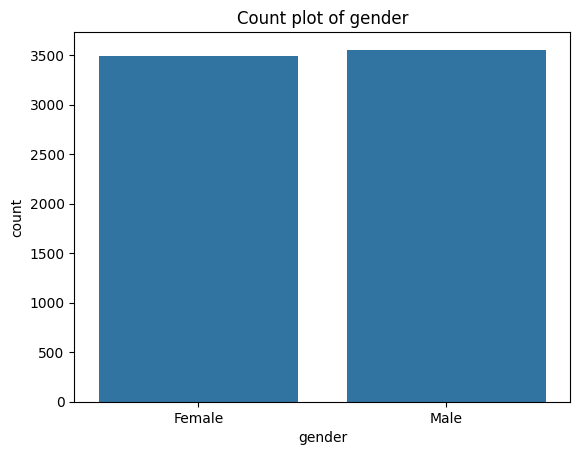

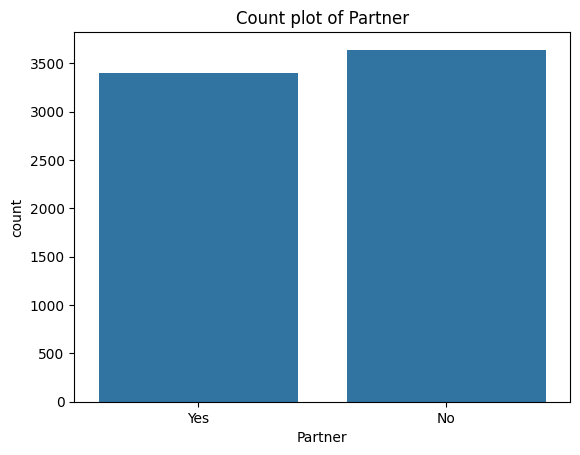

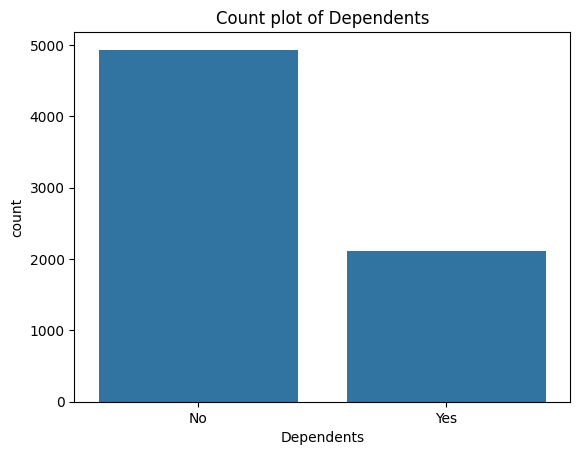

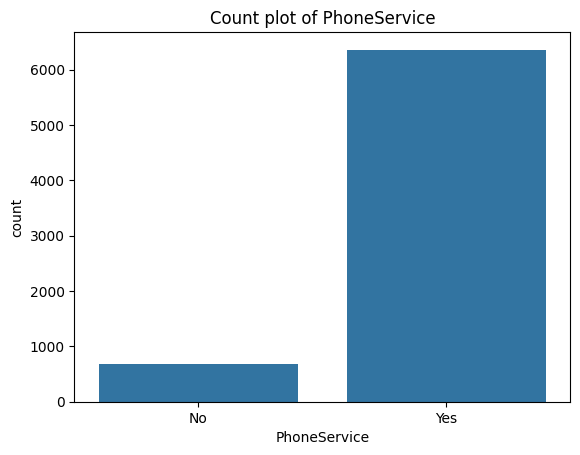

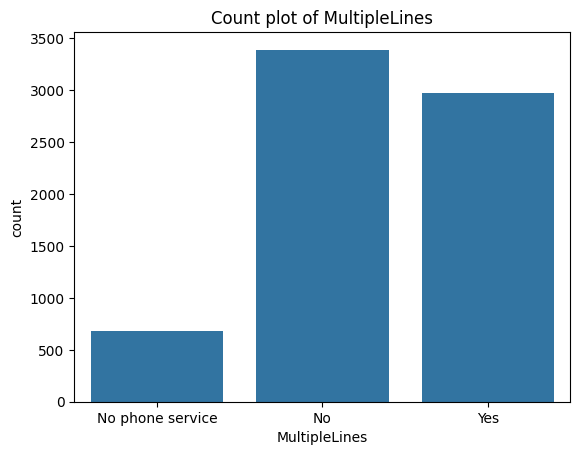

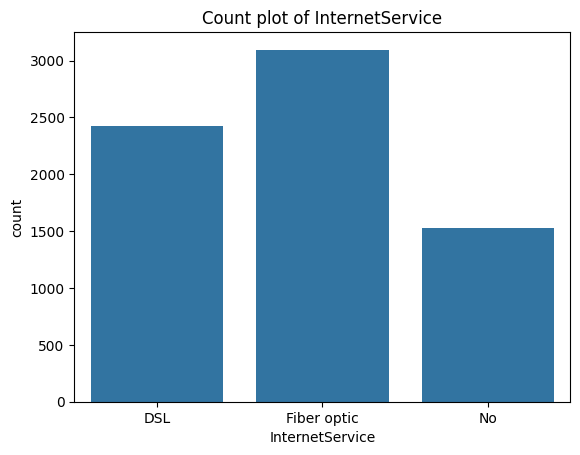

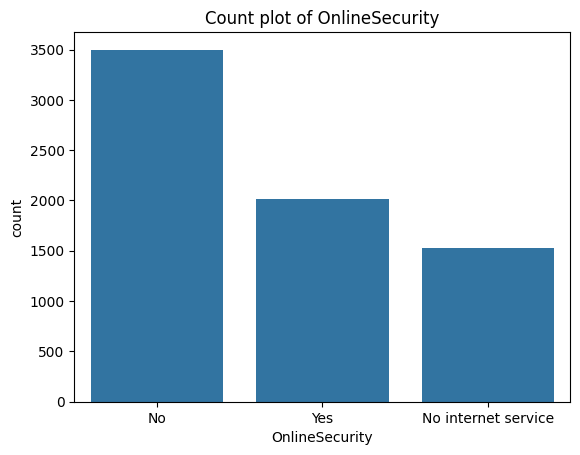

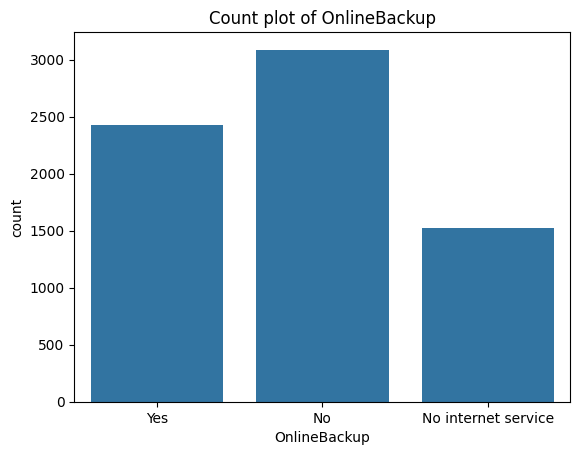

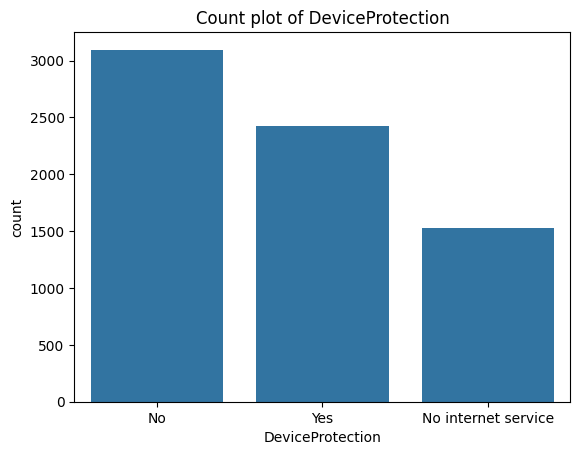

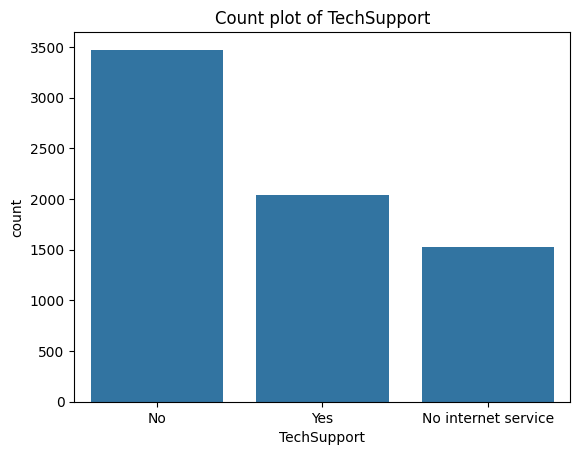

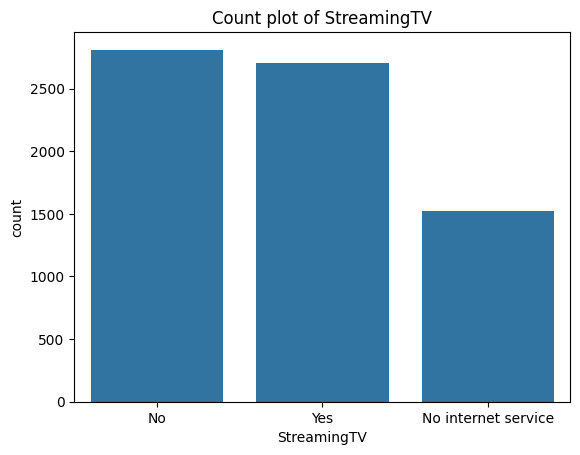

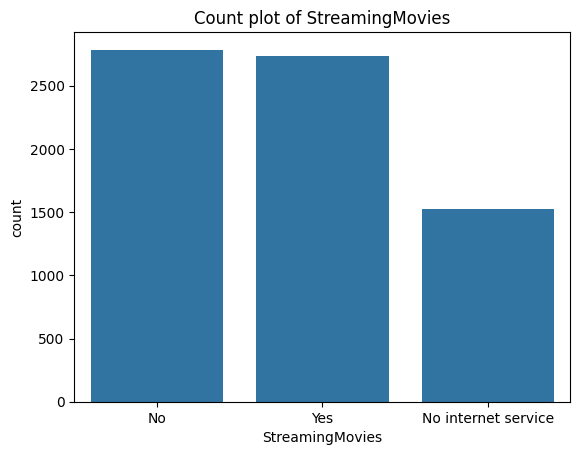

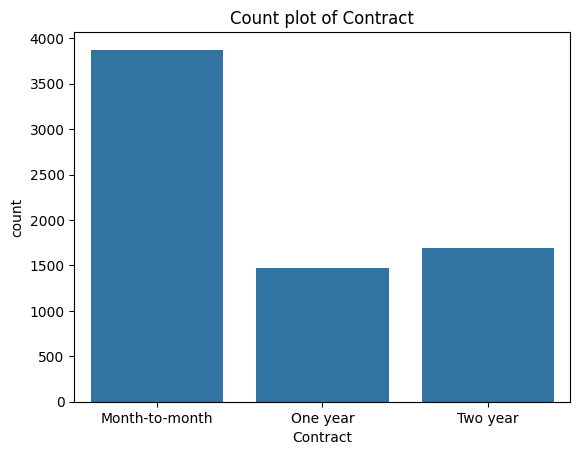

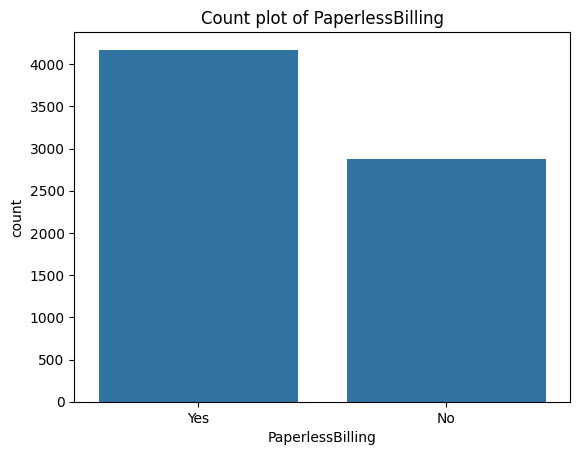

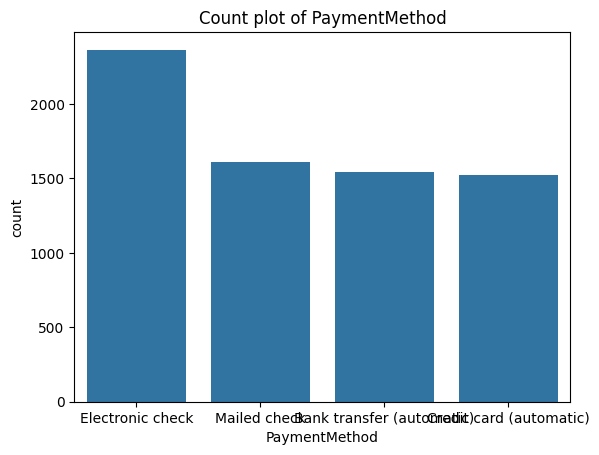

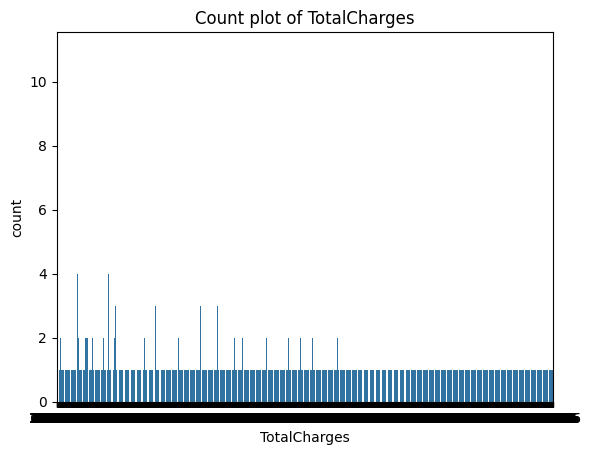

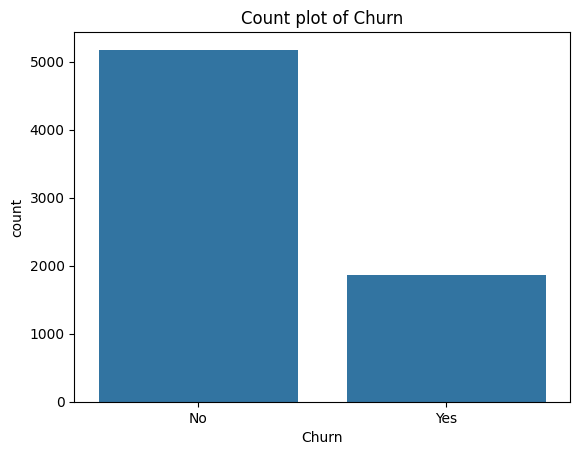

In [13]:
# Step 1: Identify categorical columns
obj_cols = df.select_dtypes(include="object").columns.to_list()
# Step 2: Add 'SeniorCitizen' to treat it like a categorical feature
obj_cols = ["SeniorCitizen"] + obj_cols


# Plot count plots for each categorical column
for col in obj_cols:
    sns.countplot(x=df[col])
    plt.title(f"Count plot of {col}")
    plt.show()

## From above graph we observer ,Class Imbalance in Target Variable (Churn)
The Churn column is imbalanced – most customers did not churn.

Example: 75% "No", 25% "Yes"

### Why It's a Problem:
If we don’t handle it, models like Logistic Regression, Random Forest, etc. may:

Predict mostly “No Churn” to get high accuracy.

But miss actual churners, which is what businesses care about.

#### How to Handle It:

SMOTE:	Generates synthetic examples for the minority class (Churn = Yes)

Class weights:	Give more importance to the minority class

Evaluation Metrics	:Use F1-Score, Recall, and AUC instead of just Accuracy

# Data Preprocessing
Data preprocessing is the cleaning and preparation of raw data so that machine learning models can understand and use it.
## Why is it needed?
Because real-world data is often:Messy,Incomplete,Not in the right format (e.g., text instead of numbers).Without preprocessing, your model may give wrong predictions or fail to work.
## How it's done (Steps):
Remove irrelevant columns (like IDs),Handle missing values,Convert data types (e.g., string to float),Encode categorical variables (LabelEncoder/OneHotEncoder)

Scale numeric values (StandardScaler/MinMaxScaler),Handle imbalance (SMOTE),Split data into training & testing sets

### Advantages:
Better accuracy,Cleaner input for ML models,Avoids errors in training

### Disadvantages:
Can be time-consuming,Needs careful handling (mistakes can affect results)

In [14]:
df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


## Label encoding of target column

In [20]:
df["Churn"] = df["Churn"].replace({"Yes":1,"No":0})

In [21]:
df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1


In [22]:
df["Churn"].value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

## Label encoding for categorical features:


In [24]:
#Identifying columns with object datatype
obj_columns=df.select_dtypes(include="object").columns
obj_columns

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'TotalCharges'],
      dtype='object')

Note: we’ve already encoded Churn, so it won’t be in this list anymore.



In [34]:
#initialize a dictionary to save the encoders:
encoders={}

#apply label encoding and store the encoders
for column in obj_columns:
    label_encoder=LabelEncoder()
    df[column]=label_encoder.fit_transform(df[column])
    encoders[column]=label_encoder


#save the encoders to a pickle file
with open("encoders.pkl","wb") as f:
    pickle.dump(encoders,f)